## Inaugurações de Estações da CPTM e do Metrô

### Pré-processamento e análise dos dados

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv("inauguracoes.csv")

dados

,Nome,Construção,Linha,Inauguração,Idade
0,Francisco Morato,CPTM,7,14/02/1867,152
1,Água Branca,CPTM,7,16/02/1867,152
2,Brás,CPTM,7,16/02/1867,152
3,Jundiaí,CPTM,7,16/02/1867,152
4,Luz,CPTM,7,16/02/1867,152
...,...,...,...,...,...
179,Campo Belo,Metrô,5,08/04/2019,0
180,Jardim Planalto,Metrô,15,26/08/2019,0
181,Fazenda da Juta,Metrô,15,16/12/2019,0
182,São Mateus,Metrô,15,16/12/2019,0


In [2]:
#desmembrando a data de inauguração em três colunas

dados['Dia'] = pd.to_datetime(dados.Inauguração).dt.day
dados['Mês'] = pd.to_datetime(dados.Inauguração).dt.month
dados['Ano'] = pd.to_datetime(dados.Inauguração).dt.year

dados.head()

,Nome,Construção,Linha,Inauguração,Idade,Dia,Mês,Ano
0,Francisco Morato,CPTM,7,14/02/1867,152,14,2,1867
1,Água Branca,CPTM,7,16/02/1867,152,16,2,1867
2,Brás,CPTM,7,16/02/1867,152,16,2,1867
3,Jundiaí,CPTM,7,16/02/1867,152,16,2,1867
4,Luz,CPTM,7,16/02/1867,152,16,2,1867


In [3]:
dados[dados.Linha == 7].sort_values(by = ['Ano', 'Mês', 'Dia', 'Nome'], ascending = True)

,Nome,Construção,Linha,Inauguração,Idade,Dia,Mês,Ano
0,Francisco Morato,CPTM,7,14/02/1867,152,14,2,1867
2,Brás,CPTM,7,16/02/1867,152,16,2,1867
3,Jundiaí,CPTM,7,16/02/1867,152,16,2,1867
4,Luz,CPTM,7,16/02/1867,152,16,2,1867
5,Perus,CPTM,7,16/02/1867,152,16,2,1867
1,Água Branca,CPTM,7,16/02/1867,152,16,2,1867
14,Campo Limpo Paulista,CPTM,7,01/01/1881,139,1,1,1881
17,Caieiras,CPTM,7,01/07/1883,136,7,1,1883
18,Pirituba,CPTM,7,01/02/1885,134,2,1,1885
21,Franco da Rocha,CPTM,7,01/02/1888,131,2,1,1888


In [4]:
dados.groupby('Linha').agg({'Idade' : np.average}).sort_values(by = ['Idade'], ascending = False)

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Idade
Linha,
7,118.894737
10,110.416667
8,92.571429
11,73.615385
12,63.900000
1,41.173913
3,34.470588
9,32.000000
2,19.571429


In [5]:
dados.groupby('Construção').agg({'Idade' : np.average}).sort_values(by = ['Idade'], ascending = False)

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Idade
Construção,
CPTM,80.673684
Metrô,22.168539


In [6]:
dados.groupby('Ano')['Nome'].count()

Ano
1867     8
1872     1
1875     5
1881     1
1883     3
        ..
2013     1
2014     4
2017     3
2018    15
2019     5
Name: Nome, Length: 62, dtype: int64

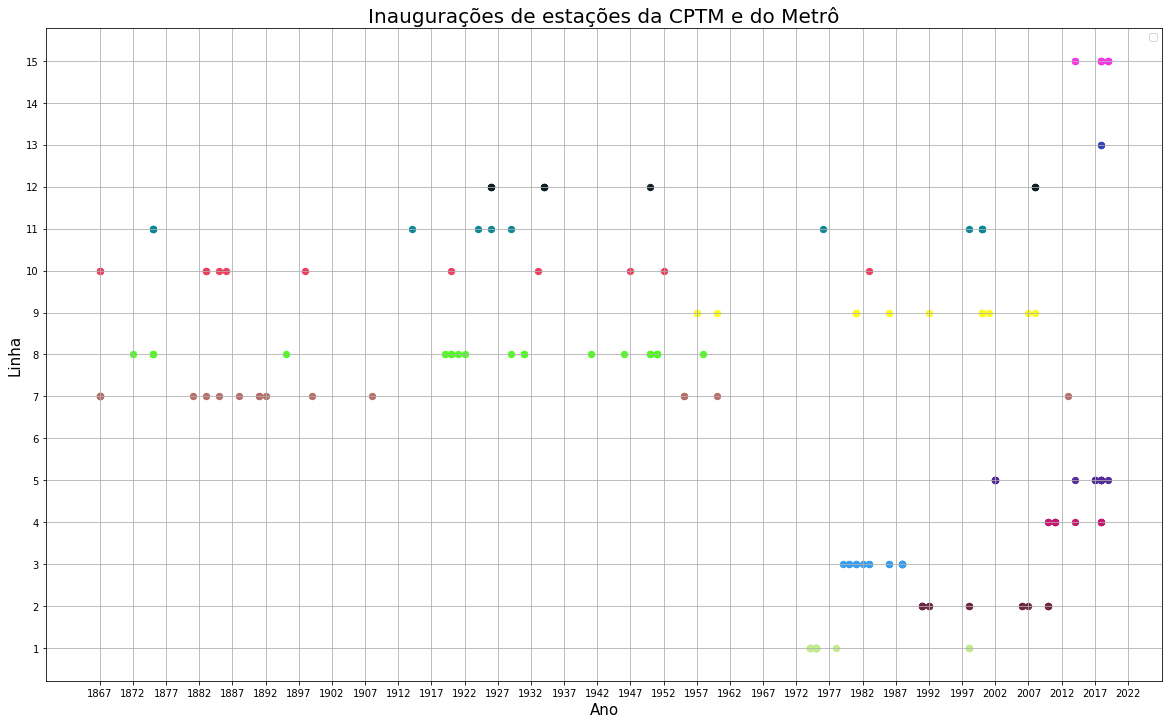

In [7]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Ano', fontsize = 15)
ax.set_ylabel('Linha', fontsize = 15)
ax.set_title('Inaugurações de estações da CPTM e do Metrô', fontsize = 20)

legenda = dados.Linha.sort_values().apply(lambda l: 'Linha ' + str(l)).unique().tolist()
linhas = dados.Linha.sort_values().unique().tolist()

n_cores = 13

cores = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n_cores)]

anos = pd.to_datetime(dados.loc[:, 'Inauguração']).dt.year

plt.xticks(np.arange(min(anos), max(anos) + 5, 5.0))
plt.yticks(np.arange(1, 16, 1.0))

ax.legend(legenda)
ax.grid()

for l, cor in zip(linhas, cores):
    indices = dados['Linha'] == l
    ax.scatter(pd.to_datetime(dados.loc[indices, 'Inauguração']).dt.year,
               dados.loc[indices, 'Linha'],
               c = cor,
               s = 40)

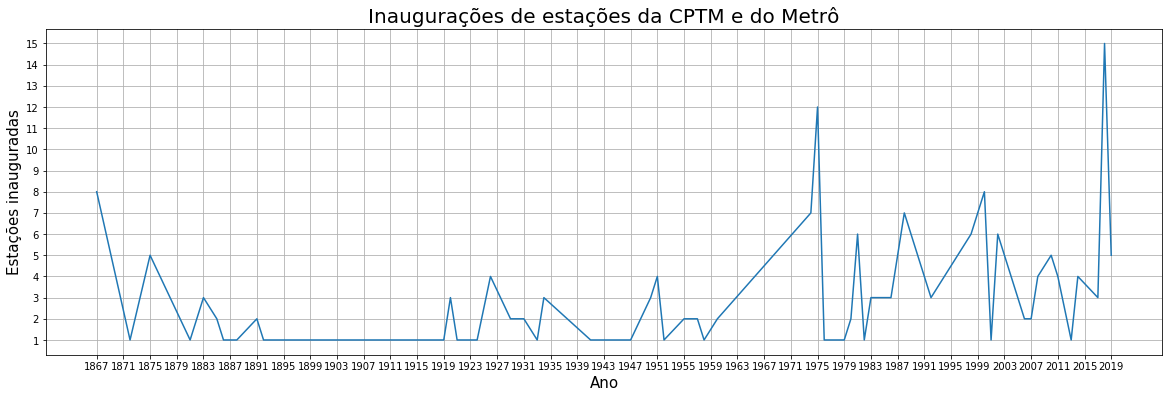

In [8]:
fig = plt.figure(figsize = (20,6))

ax = fig.add_subplot(1, 1, 1) 

ax.set_xlabel('Ano', fontsize = 15)
ax.set_ylabel('Estações inauguradas', fontsize = 15)
ax.set_title('Inaugurações de estações da CPTM e do Metrô', fontsize = 20)

ax.grid()

anos = dados.Ano.unique()
inauguracoes = dados.groupby('Ano')['Nome'].count().tolist()

plt.xticks(np.arange(min(anos), max(anos) + 4, 4.0))
plt.yticks(np.arange(min(inauguracoes), max(inauguracoes) + 1, 1.0))

ax.plot(anos, inauguracoes)

<BarContainer object of 62 artists>

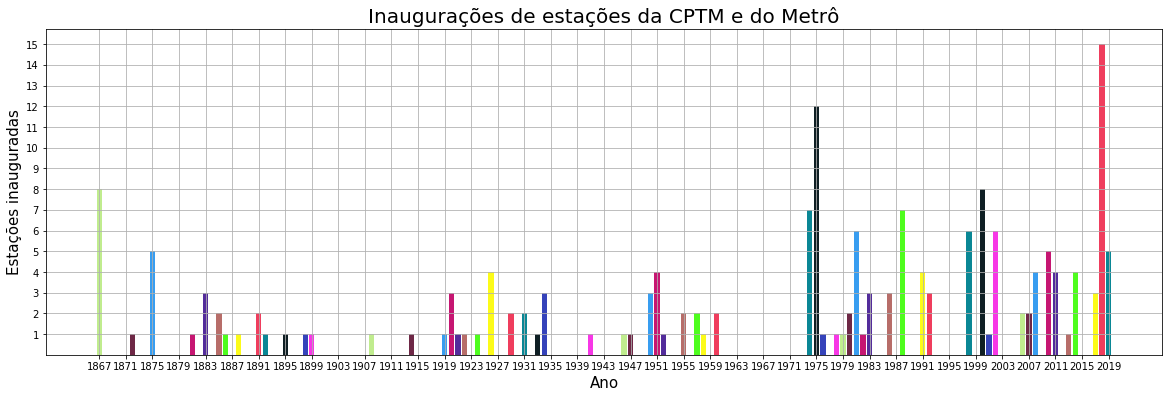

In [9]:
fig = plt.figure(figsize = (20,6))

ax = fig.add_subplot(1, 1, 1) 

ax.set_xlabel('Ano', fontsize = 15)
ax.set_ylabel('Estações inauguradas', fontsize = 15)
ax.set_title('Inaugurações de estações da CPTM e do Metrô', fontsize = 20)

anos = dados.Ano.unique()
inauguracoes = dados.groupby('Ano')['Nome'].count().tolist()

plt.xticks(np.arange(min(anos), max(anos) + 4, 4.0))
plt.yticks(np.arange(min(inauguracoes), max(inauguracoes) + 1, 1.0))

ax.grid()

plt.bar(anos, inauguracoes, color = cores)

<BarContainer object of 48 artists>

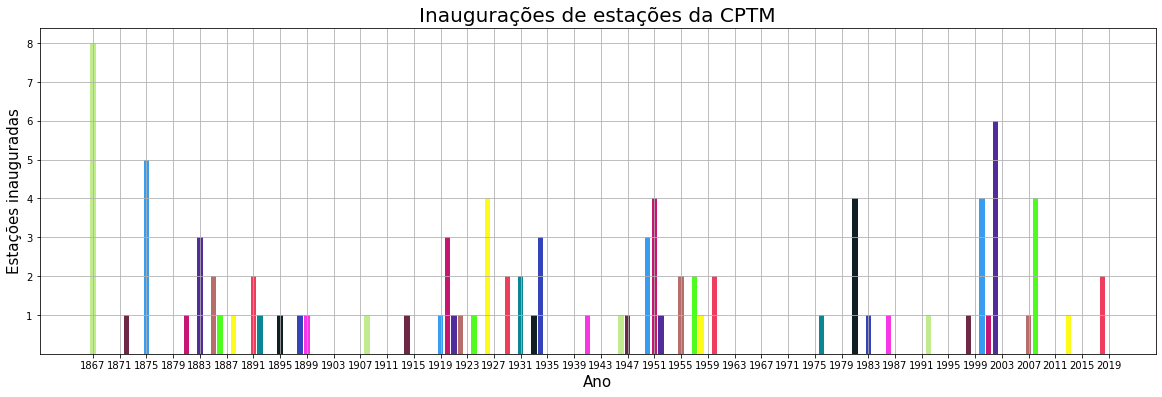

In [10]:
fig = plt.figure(figsize = (20,6))

ax = fig.add_subplot(1, 1, 1) 

ax.set_xlabel('Ano', fontsize = 15)
ax.set_ylabel('Estações inauguradas', fontsize = 15)
ax.set_title('Inaugurações de estações da CPTM', fontsize = 20)

anos = dados[dados.Construção == 'CPTM'].Ano.unique()
inauguracoes = dados[dados.Construção == 'CPTM'].groupby('Ano')['Nome'].count().tolist()

plt.xticks(np.arange(min(anos), max(anos) + 4, 4.0))
plt.yticks(np.arange(min(inauguracoes), max(inauguracoes) + 1, 1.0))

ax.grid()

plt.bar(anos, inauguracoes, color = cores)

<BarContainer object of 22 artists>

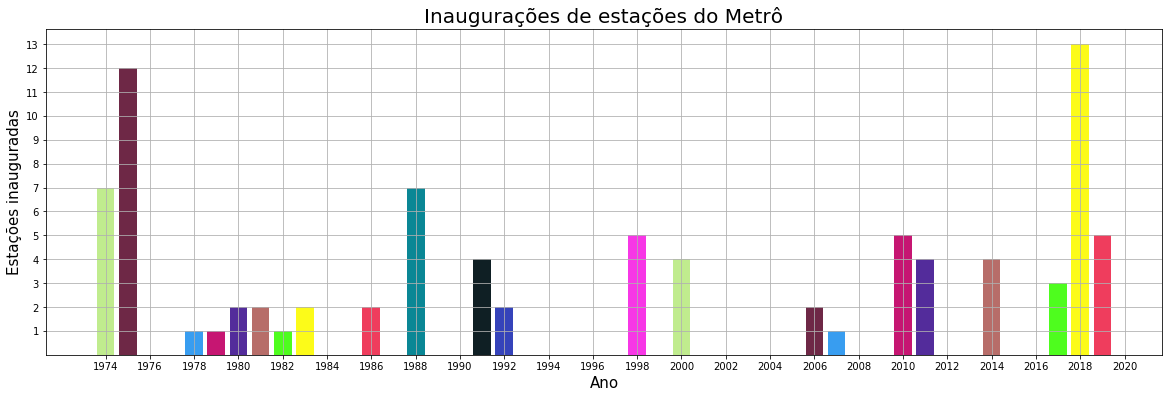

In [11]:
fig = plt.figure(figsize = (20,6))

ax = fig.add_subplot(1, 1, 1) 

ax.grid()
ax.set_xlabel('Ano', fontsize = 15)
ax.set_ylabel('Estações inauguradas', fontsize = 15)
ax.set_title('Inaugurações de estações do Metrô', fontsize = 20)

anos = dados[dados.Construção == 'Metrô'].Ano.unique()
inauguracoes = dados[dados.Construção == 'Metrô'].groupby('Ano')['Nome'].count().tolist()

plt.xticks(np.arange(min(anos), max(anos) + 2, 2.0))
plt.yticks(np.arange(min(inauguracoes), max(inauguracoes) + 1, 1.0))

plt.bar(anos, inauguracoes, color = cores)

(array([ 7., 12.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,  7.,  4.,  2.,  5.,
         4.,  2.,  1.,  5.,  4.,  4.,  3., 18.]),
 array([1974, 1975, 1978, 1979, 1980, 1981, 1982, 1983, 1986, 1988, 1991,
        1992, 1998, 2000, 2006, 2007, 2010, 2011, 2014, 2017, 2018, 2019],
       dtype=int64),
 <a list of 21 Patch objects>)

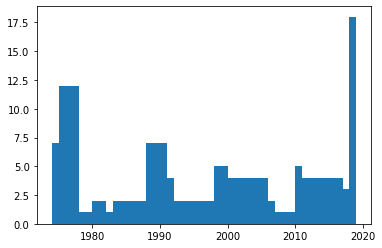

In [12]:
inauguracoes = dados.loc[dados.Construção == 'Metrô', 'Ano']
bins = dados[dados.Construção == 'Metrô'].Ano.unique()

plt.hist(inauguracoes, bins)

In [13]:
#inaugurações em anos eleitorais (pós-ditadura, todos os anos pares)

anos_eleitorais = list(range(1988, 2020, 2))

anos_eleitorais

[1988,
 1990,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016,
 2018]

In [14]:
dados['AnoEleitoral'] = dados.apply(lambda row: 'Sim' if row.Ano in anos_eleitorais else 'Não', 1)
dados

,Nome,Construção,Linha,Inauguração,Idade,Dia,Mês,Ano,AnoEleitoral
0,Francisco Morato,CPTM,7,14/02/1867,152,14,2,1867,Não
1,Água Branca,CPTM,7,16/02/1867,152,16,2,1867,Não
2,Brás,CPTM,7,16/02/1867,152,16,2,1867,Não
3,Jundiaí,CPTM,7,16/02/1867,152,16,2,1867,Não
4,Luz,CPTM,7,16/02/1867,152,16,2,1867,Não
...,...,...,...,...,...,...,...,...,...
179,Campo Belo,Metrô,5,08/04/2019,0,4,8,2019,Não
180,Jardim Planalto,Metrô,15,26/08/2019,0,26,8,2019,Não
181,Fazenda da Juta,Metrô,15,16/12/2019,0,16,12,2019,Não
182,São Mateus,Metrô,15,16/12/2019,0,16,12,2019,Não


In [15]:
estacoes_eleitorais = dados[dados.AnoEleitoral == 'Sim'].groupby('Construção').agg({'Construção' : 'count'})
estacoes_eleitorais.columns = ['Estações']

estacoes_eleitorais = estacoes_eleitorais.reset_index()
estacoes_eleitorais

,Construção,Estações
0,CPTM,18
1,Metrô,42


Text(0, 0.5, 'Estações inauguradas')

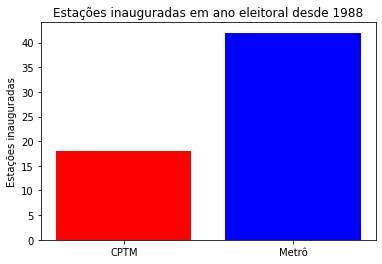

In [16]:
plt.bar(estacoes_eleitorais.Construção, estacoes_eleitorais.Estações, label = 'Inaugurações', color = 'rb')
plt.title('Estações inauguradas em ano eleitoral desde 1988')
plt.ylabel('Estações inauguradas')

In [17]:
estacoes_eleitorais = dados[dados.Ano >= 1988].groupby(['Construção', 'AnoEleitoral']).agg({'AnoEleitoral' : 'count'})
estacoes_eleitorais.columns = ['Estações']

estacoes_eleitorais = estacoes_eleitorais.reset_index()
estacoes_eleitorais

,Construção,AnoEleitoral,Estações
0,CPTM,Não,3
1,CPTM,Sim,18
2,Metrô,Não,17
3,Metrô,Sim,42


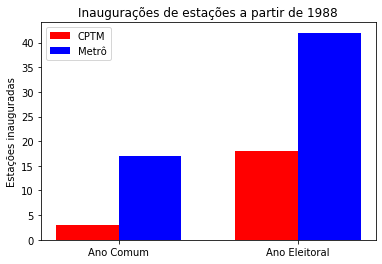

In [18]:
labels = ['Ano Comum', 'Ano Eleitoral']

dados_cptm = list(estacoes_eleitorais.loc[estacoes_eleitorais.Construção == 'CPTM', 'Estações'])
dados_metro = list(estacoes_eleitorais.loc[estacoes_eleitorais.Construção == 'Metrô', 'Estações'])

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

bar_cptm = plt.bar(x - (width / 2), dados_cptm, width, label = 'CPTM', color = 'r')
bar_metro = plt.bar(x + (width / 2), dados_metro, width, label = 'Metrô', color = 'b')

ax.set_title('Inaugurações de estações a partir de 1988')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Estações inauguradas')
ax.legend()

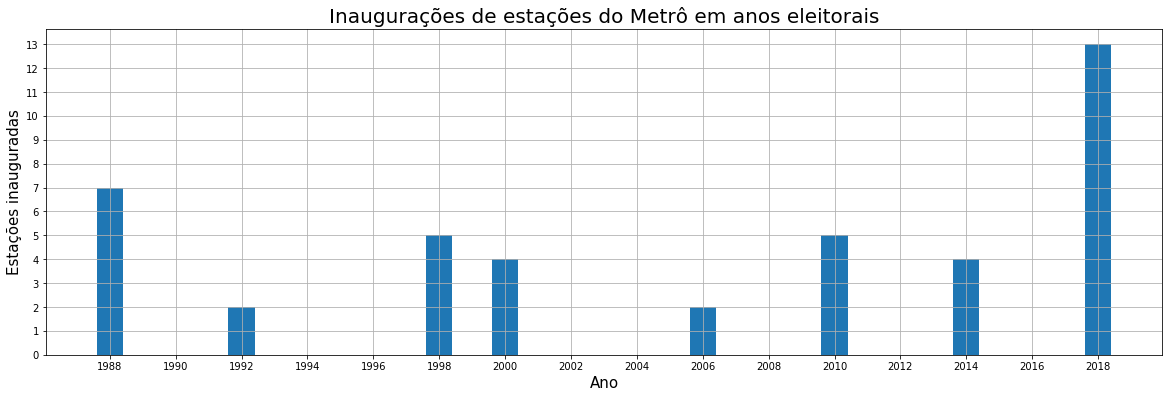

In [19]:
anos = dados[(dados.AnoEleitoral == 'Sim') & (dados.Construção == 'Metrô')].Ano.unique()
inauguracoes = dados[(dados.AnoEleitoral == 'Sim') & (dados.Construção == 'Metrô')].groupby('Ano')['Nome'].count().tolist()

plt.figure(figsize = (20,6))

plt.bar(anos, inauguracoes)

plt.title('Inaugurações de estações do Metrô em anos eleitorais', fontsize = 20)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Estações inauguradas', fontsize = 15)
plt.xticks(np.arange(min(anos), max(anos) + 2, 2.0))
plt.yticks(np.arange(0, max(inauguracoes) + 1, 1.0))
plt.grid()

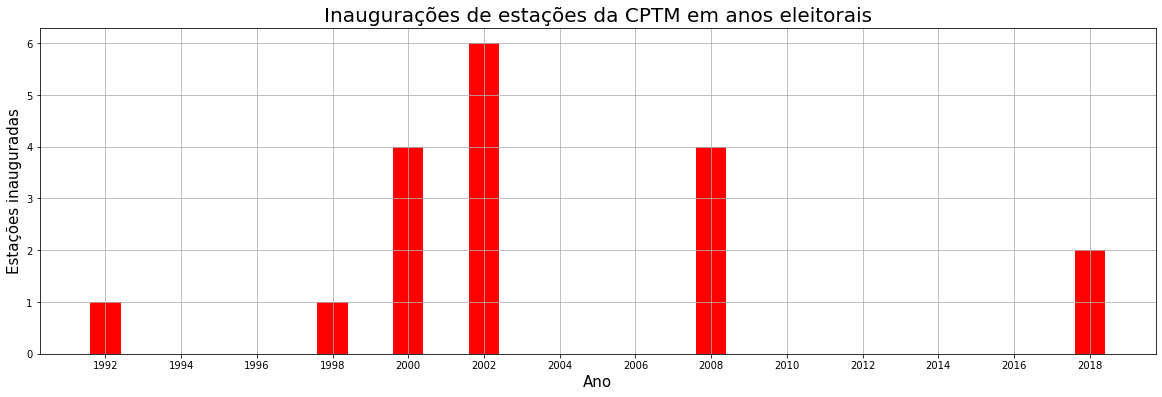

In [20]:
anos = dados[(dados.AnoEleitoral == 'Sim') & (dados.Construção == 'CPTM')].Ano.unique()
inauguracoes = dados[(dados.AnoEleitoral == 'Sim') & (dados.Construção == 'CPTM')].groupby('Ano')['Nome'].count().tolist()

plt.figure(figsize = (20, 6))

plt.bar(anos, inauguracoes, color = 'r')

plt.title('Inaugurações de estações da CPTM em anos eleitorais', fontsize = 20)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Estações inauguradas', fontsize = 15)
plt.xticks(np.arange(min(anos), max(anos) + 2, 2.0))
plt.yticks(np.arange(0, max(inauguracoes) + 1, 1.0))
plt.grid()

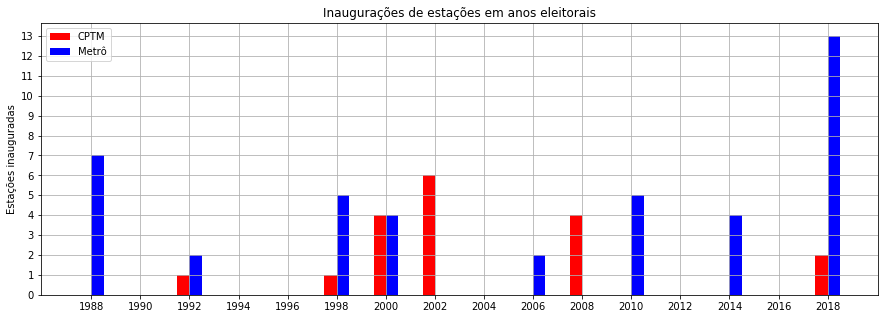

In [21]:
dados_cptm = []
dados_metro = []

for a in anos_eleitorais:
    dados_cptm.append(len(dados[(dados.Construção == 'CPTM') & (dados.Ano == a)]))
    dados_metro.append(len(dados[(dados.Construção == 'Metrô') & (dados.Ano == a)]))

x = np.arange(len(anos_eleitorais))
width = 0.25

fig, ax = plt.subplots(figsize = (15, 5))

bar_cptm = plt.bar(x - (width / 2), dados_cptm, width, label = 'CPTM', color = 'r')
bar_metro = plt.bar(x + (width / 2), dados_metro, width, label = 'Metrô', color = 'b')

ax.set_title('Inaugurações de estações em anos eleitorais')
ax.set_xticks(x)
ax.set_xticklabels(anos_eleitorais)
ax.set_ylabel('Estações inauguradas')
ax.set_yticks(np.arange(min(dados_metro), max(dados_metro) + 1, 1.0))
ax.legend()
ax.grid()